# Unspuervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Clustering

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X =data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

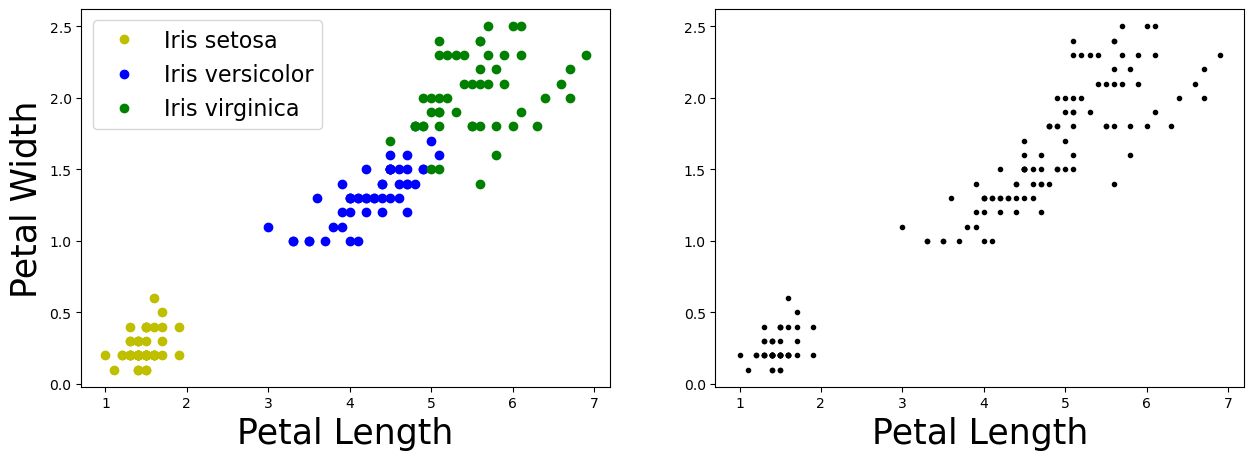

In [4]:
parameters = {'axes.labelsize': 25, 'axes.titlesize': 35}
plt.rcParams.update(parameters)

_, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

axes[0].plot(X[y == 0, 2], X[y == 0, 3], "yo", label="Iris setosa")
axes[0].plot(X[y == 1, 2], X[y == 1, 3], "bo", label="Iris versicolor")
axes[0].plot(X[y == 2, 2], X[y == 2, 3], "go", label="Iris virginica")

axes[0].set(xlabel="Petal Length", ylabel="Petal Width")
axes[0].legend(fontsize=16)

axes[1].scatter(X[:, 2], X[:, 3], c="k", marker=".")
axes[1].set(xlabel="Petal Length")

plt.show()

# GMM Gaussian Mixure Model

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
gm = GaussianMixture(n_components=3,random_state=42)

In [7]:
y_pred = gm.fit_predict(X)

Map each cluster to a class. 
 
 Instead of hard coding the mapping (as is done in the book, for simplicity), we will pick the most common class for each cluster (using the `scipy.stats.mode()` function):

In [8]:
from scipy import stats

In [9]:
mapping = {}
for class_id in np.unique(y):
    mode,_= stats.mode(y_pred[y == class_id])
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

In [10]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

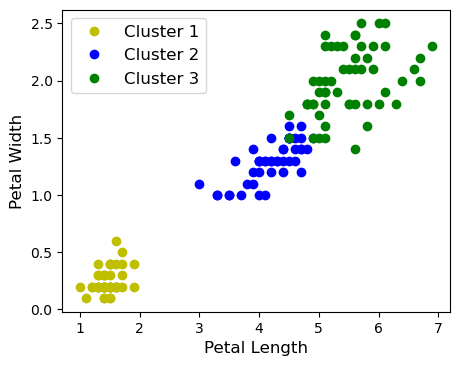

In [16]:
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

_, ax = plt.subplots(figsize=(5, 4), dpi=100)

ax.plot(X[y_pred == 0, 2], X[y_pred == 0, 3], "yo", label="Cluster 1")
ax.plot(X[y_pred == 1, 2], X[y_pred == 1, 3], "bo", label="Cluster 2")
ax.plot(X[y_pred == 2, 2], X[y_pred == 2, 3], "go", label="Cluster 3")

ax.set(xlabel="Petal Length", ylabel="Petal Width")
ax.legend(fontsize=12)

plt.show()

In [17]:
np.sum(y_pred == y) / len(y)

0.9666666666666667